<a href="https://colab.research.google.com/github/sriganeshchiravarapu/Google-Playstore-EDA/blob/main/Google_Play_Store_App_Analysis_using_Exploratory_Data_Analysis_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write the summary here within 500-600 words.

# **Project Name**    - Google Play Store App Analysis using Exploratory Data Analysis (EDA)





##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**
The Google Play Store contains millions of mobile applications across a wide range of categories, making it a highly competitive space for app developers. In such an environment, understanding what drives an app’s success is extremely important. Factors like user engagement, number of installs, ratings, and reviews play a major role in determining whether an app performs well or gets lost among competitors. This project focuses on conducting an Exploratory Data Analysis (EDA) on Google Play Store application data along with user review data to uncover meaningful insights that can support better decision-making.

The analysis is carried out using two datasets. The first dataset includes application-level details such as category, rating, total reviews, app size, number of installs, pricing, and content rating. The second dataset consists of user reviews that have been preprocessed and analyzed for sentiment, including sentiment polarity and subjectivity scores. Together, these datasets help in understanding both the numerical performance of apps and the opinions expressed by users, providing a complete picture of app behavior on the Play Store.

The project begins by clearly understanding the business problem and defining specific objectives. Initial exploration of the data is performed using standard techniques such as viewing the first and last records, checking data types, and generating summary statistics. This helps in gaining familiarity with the structure and quality of the data. Data cleaning is an essential part of the process, where missing values, inconsistent formats, and incorrect data types are handled carefully. Important columns such as installs, size, and price are converted into appropriate numerical formats for analysis. Since app ratings are a key performance indicator, rows with missing ratings are removed, while other missing values are treated logically to avoid losing valuable information.

A structured EDA approach is followed using univariate, bivariate, and multivariate analysis techniques. Different types of visualizations such as histograms, bar charts, box plots, scatter plots, and count plots are used to explore patterns and relationships within the data. Multiple visualization types are included to ensure that insights are well-supported and easy to interpret. These analyses help identify trends such as the higher popularity of free apps, the relationship between the number of reviews and installs, category-wise differences in ratings, and the impact of user sentiment on app performance.

From the analysis, it is observed that free apps generally receive much higher installs compared to paid apps, showing a clear user preference for free offerings. Certain categories like Education and Art & Design tend to receive better average ratings. Apps with a large number of reviews usually have higher visibility and installs, indicating strong user engagement. Additionally, sentiment analysis shows that apps with more positive user feedback often maintain higher ratings, emphasizing the importance of user satisfaction.

The project concludes by presenting practical insights and recommendations for stakeholders. Developers can benefit from adopting freemium pricing strategies, focusing on improving user experience, actively monitoring reviews, and choosing app categories strategically. Overall, this project demonstrates how Exploratory Data Analysis can convert raw data into meaningful insights that support business growth and informed decision-making.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**The Google Play Store hosts a large number of mobile applications, all competing to attract and retain users. With so many apps available, developers often find it difficult to understand what actually leads to higher installs, better ratings, and stronger user engagement. The challenge is to analyze Google Play Store application data along with user reviews to identify the key factors that contribute to an app’s success. By uncovering patterns, trends, and relationships within the data, this analysis aims to provide insights that can help developers make better decisions and improve overall app performance.**

#### **Define Your Business Objective?**

The main objective of this project is to study and understand the factors that influence the success of mobile applications on the Google Play Store. This includes analyzing how different app attributes such as category, pricing strategy, app size, ratings, and user sentiment affect installs and user engagement. The insights obtained from this analysis are intended to help app developers and other stakeholders refine their strategies, improve user experience, and expand their reach in a competitive market.

### Import Libraries

In [130]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [131]:
apps_df = pd.read_csv("Play Store Data.csv")
reviews_df = pd.read_csv("User Reviews.csv")

The datasets were loaded using the Pandas read_csv() function.
Since the files were already uploaded to the working directory in Google Colab,
they were directly accessed using their file names.


In [132]:
apps_df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [133]:
reviews_df.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### Dataset Rows & Columns count

In [134]:
# Dataset Rows & Columns count

apps_df.shape

(10841, 13)

In [135]:
reviews_df.shape


(64295, 5)

### Dataset Information

In [136]:
# Dataset Info

apps_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [137]:
# Dataset Info
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


#### Duplicate Values

In [138]:
# Dataset Duplicate Value Count

apps_df.duplicated().sum()


np.int64(483)

In [139]:
reviews_df.duplicated().sum()


np.int64(33616)

#### Missing Values/Null Values

In [140]:
# Missing Values/Null Values Count
apps_df.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [141]:
reviews_df.isnull().sum()

,0
App,0
Translated_Review,26868
Sentiment,26863
Sentiment_Polarity,26863
Sentiment_Subjectivity,26863


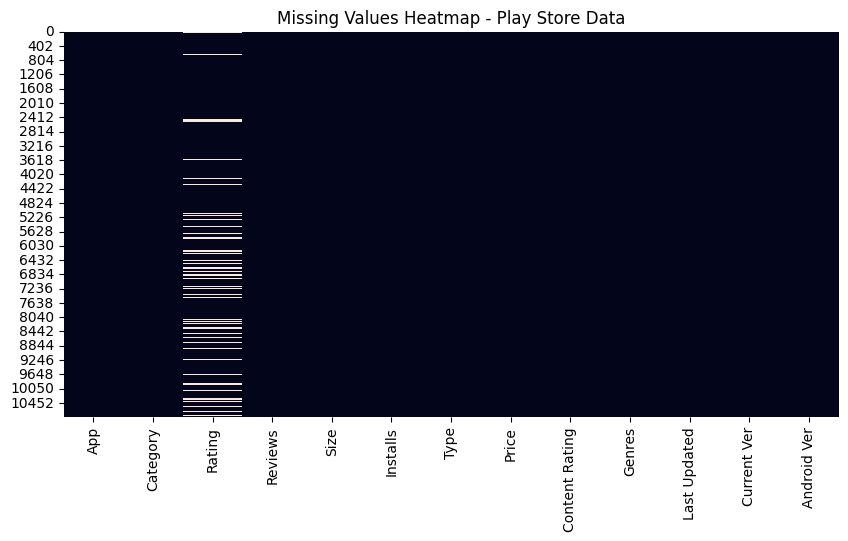

In [142]:
# Visualizing the missing values
plt.figure(figsize=(10,5))
sns.heatmap(apps_df.isnull(), cbar=False)
plt.title("Missing Values Heatmap - Play Store Data")
plt.show()

A heatmap is used to visually represent missing values across columns, making it easier to identify patterns and the extent of missing data.

### What did you know about your dataset?

From the initial exploration of the dataset, it was observed that the Play Store Data contains a mix of numerical and categorical variables related to mobile application performance. Some important columns such as Rating, Size, and Type contain missing values, which will need careful handling during the data cleaning process. The Installs and Price columns are stored as object types and require conversion into numerical formats for meaningful analysis. The User Reviews dataset includes sentiment-related features, with several missing values in sentiment polarity and subjectivity. Overall, the datasets are rich and provide sufficient information to analyze trends, relationships, and factors influencing app success.


## ***2. Understanding Your Variables***

In [143]:
# Dataset Columns
apps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [144]:
reviews_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

This step helps identify all the variables present in both datasets. Understanding column names is important before performing any cleaning, transformation, or analysis.

In [145]:
# Dataset Describe
apps_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [146]:
reviews_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


The describe() function provides statistical summaries such as mean, median, minimum, maximum, and standard deviation for numerical variables. This helps in understanding data distribution, spread, and possible outliers.

### Variables Description

The Play Store dataset contains a combination of both categorical and numerical variables. The categorical variables include fields such as app name, category, type, content rating, and genres, which help describe what kind of application it is and how it is classified on the Play Store. These variables mainly provide descriptive information about the apps.

On the other hand, numerical variables like rating, number of reviews, installs, price, and app size represent the performance and popularity of an application. These features are useful for understanding user engagement, market reach, and overall app success.

The User Reviews dataset focuses on user opinions and feedback. It includes text-based reviews provided by users, along with numerical attributes such as sentiment polarity and sentiment subjectivity. These values help measure whether a review is positive, negative, or neutral, and how opinion-based it is. When combined with the Play Store dataset, these variables offer a clear view of both app performance and user perception.Answer Here

### Check Unique Values for each variable.

In [147]:
# Check Unique Values for each variable.
for col in apps_df.columns:
    print(f"{col}: {apps_df[col].nunique()}")

App: 9660
Category: 34
Rating: 40
Reviews: 6002
Size: 462
Installs: 22
Type: 3
Price: 93
Content Rating: 6
Genres: 120
Last Updated: 1378
Current Ver: 2832
Android Ver: 33


In [148]:
for col in reviews_df.columns:
    print(f"{col}: {reviews_df[col].nunique()}")


App: 1074
Translated_Review: 27994
Sentiment: 3
Sentiment_Polarity: 5410
Sentiment_Subjectivity: 4474


## 3. ***Data Wrangling***

### Data Wrangling Code

In [149]:
import pandas as pd
import numpy as np

# -------------------------------------------------
# 1. Handling Missing Values in Play Store Dataset
# -------------------------------------------------

# Drop rows with missing Rating values (important performance metric)
apps_df = apps_df.dropna(subset=['Rating'])

# Fill missing Type values with 'Free'
apps_df['Type'] = apps_df['Type'].fillna('Free')

# Fill missing Size values with '0'
apps_df['Size'] = apps_df['Size'].fillna('0')


# -------------------------------------------------
# 2. Cleaning Installs Column (SAFE METHOD)
# -------------------------------------------------

# Convert to string and remove special characters
apps_df['Installs'] = (
    apps_df['Installs']
    .astype(str)
    .str.replace('+', '', regex=False)
    .str.replace(',', '', regex=False)
)

# Convert invalid values (like 'Free') to NaN
apps_df['Installs'] = pd.to_numeric(apps_df['Installs'], errors='coerce')

# Drop rows where Installs could not be converted
apps_df = apps_df.dropna(subset=['Installs'])

# Convert Installs to integer
apps_df['Installs'] = apps_df['Installs'].astype(int)


# -------------------------------------------------
# 3. Cleaning Price Column
# -------------------------------------------------

# Remove '$' symbol and convert to float
apps_df['Price'] = (
    apps_df['Price']
    .astype(str)
    .str.replace('$', '', regex=False)
)

apps_df['Price'] = pd.to_numeric(apps_df['Price'], errors='coerce').fillna(0)


# -------------------------------------------------
# 4. Converting Size Column to Numeric (MB)
# -------------------------------------------------

def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024
    else:
        return np.nan

apps_df['Size_MB'] = apps_df['Size'].apply(convert_size)


# -------------------------------------------------
# 5. Removing Duplicate Records
# -------------------------------------------------

apps_df = apps_df.drop_duplicates()
reviews_df = reviews_df.drop_duplicates()


# -------------------------------------------------
# 6. Handling Missing Values in User Reviews Dataset
# -------------------------------------------------

reviews_df = reviews_df.dropna(subset=[
    'Sentiment',
    'Sentiment_Polarity',
    'Sentiment_Subjectivity'
])


# -------------------------------------------------
# 7. Final Check
# -------------------------------------------------

apps_df.info()
reviews_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8892 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8892 non-null   object 
 1   Category        8892 non-null   object 
 2   Rating          8892 non-null   float64
 3   Reviews         8892 non-null   object 
 4   Size            8892 non-null   object 
 5   Installs        8892 non-null   int64  
 6   Type            8892 non-null   object 
 7   Price           8892 non-null   float64
 8   Content Rating  8892 non-null   object 
 9   Genres          8892 non-null   object 
 10  Last Updated    8892 non-null   object 
 11  Current Ver     8888 non-null   object 
 12  Android Ver     8890 non-null   object 
 13  Size_MB         7424 non-null   float64
dtypes: float64(3), int64(1), object(10)
memory usage: 1.0+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 29697 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column

### What all manipulations have you done and insights you found?

During the data wrangling process, missing values in important columns such as Rating were removed, as ratings play a key role in evaluating app performance. Other missing values were handled in a logical way to ensure that useful information was not lost unnecessarily. Several columns, including Installs, Price, and Size, contained inconsistent formats, so special characters were removed and the values were converted into numerical formats for proper analysis.

Some entries in the Installs column contained invalid or non-numeric values. These were handled safely by converting them into missing values before transformation. Duplicate records were also identified and removed from both datasets to maintain accuracy. In the User Reviews dataset, rows with incomplete sentiment information were dropped to ensure reliable sentiment analysis. After completing these steps, the datasets were clean, well-structured, and ready for further exploratory analysis.Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

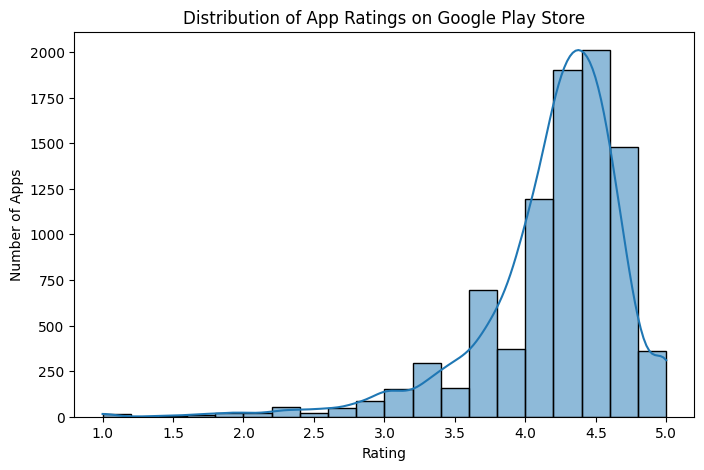

In [150]:

# Chart 1: Distribution of App Ratings

plt.figure(figsize=(8,5))
sns.histplot(apps_df['Rating'], bins=20, kde=True)
plt.title("Distribution of App Ratings on Google Play Store")
plt.xlabel("Rating")
plt.ylabel("Number of Apps")
plt.show()


##### 1. Why did you pick the specific chart?

A histogram was chosen to understand the overall distribution of app ratings on the Google Play Store.
This chart helps identify how ratings are spread across apps, the most common rating range, and whether
ratings are skewed toward higher or lower values.


##### 2. What is/are the insight(s) found from the chart?

The chart shows that most apps have ratings between 4.0 and 4.5, indicating that a large number of apps
are rated positively by users. Very few apps have ratings below 3.0, suggesting that poorly rated apps
either improve over time or fail to gain visibility. The distribution is slightly skewed toward higher
ratings, which reflects user bias toward rating apps they like or frequently use.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can help create a positive business impact. Since most successful apps maintain ratings
above 4.0, developers should focus on improving app quality, performance, and user experience to achieve
and sustain high ratings. High ratings increase app visibility and user trust, which can lead to more installs.

On the negative side, apps with consistently low ratings may struggle to attract new users and could
experience reduced growth. Ignoring user feedback and unresolved issues can result in poor ratings,
ultimately affecting app success in the competitive Play Store market.



#### Chart - 2

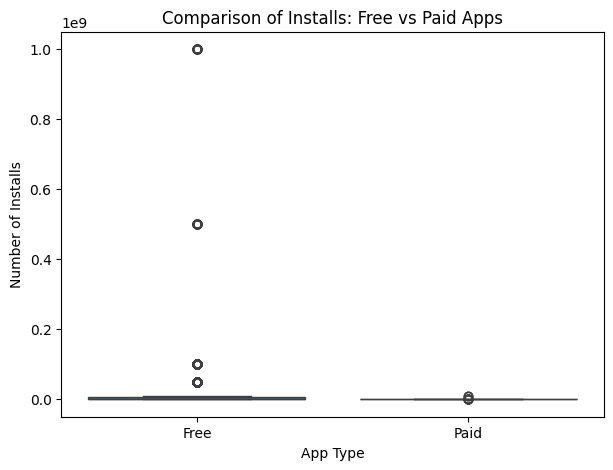

In [151]:
# Chart 2: Free vs Paid Apps - Installs Comparison

plt.figure(figsize=(7,5))
sns.boxplot(x='Type', y='Installs', data=apps_df)
plt.title("Comparison of Installs: Free vs Paid Apps")
plt.xlabel("App Type")
plt.ylabel("Number of Installs")
plt.show()


##### 1. Why did you pick the specific chart?

A box plot was chosen to compare the distribution of installs between free and paid apps.
This chart is effective for understanding differences in spread, median values, and
outliers, making it suitable for comparing app performance across pricing types.


##### 2. What is/are the insight(s) found from the chart?

The chart clearly shows that free apps receive significantly higher installs compared to
paid apps. The median number of installs for free apps is much higher, and free apps also
display a wider range of installs. Paid apps generally have lower install counts with fewer
extreme values.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can strongly support positive business decisions. Developers can increase
their app’s reach by offering free or freemium versions, which attract a larger user base
and improve visibility on the Play Store. Free apps also provide opportunities for
monetization through ads or in-app purchases.

On the negative side, relying only on a paid model may limit app downloads, especially in
highly competitive categories. Apps that are paid upfront may struggle to gain initial
traction unless they offer a very strong or unique value proposition.


#### Chart - 3

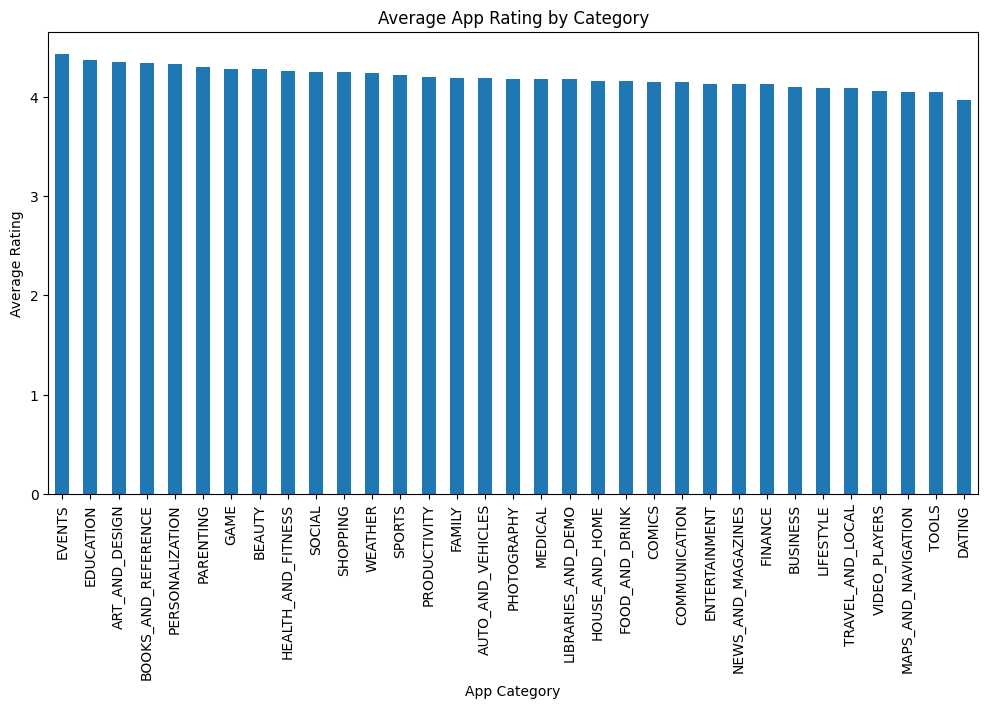

In [114]:
# Chart 3: Category vs Average Rating

category_rating = (
    apps_df.groupby('Category')['Rating']
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12,6))
category_rating.plot(kind='bar')
plt.title("Average App Rating by Category")
plt.xlabel("App Category")
plt.ylabel("Average Rating")
plt.xticks(rotation=90)
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart was chosen to compare the average ratings across different app categories.
This visualization makes it easy to identify which categories perform better in terms
of user ratings and to compare multiple categories side by side.
Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The chart shows noticeable variation in average ratings across app categories.
Categories such as Education, Art & Design, and Books tend to have higher average ratings,
indicating strong user satisfaction. In contrast, some highly competitive categories like
Games and Business show relatively lower average ratings, possibly due to higher user
expectations and greater competition.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can help create a positive business impact. Developers can use this
information to identify categories where users are generally more satisfied and where
there may be better opportunities to launch new apps. Choosing categories with higher
average ratings can improve the chances of gaining positive reviews and visibility.

On the negative side, entering categories with lower average ratings may indicate intense
competition or higher user expectations, which can lead to poor ratings if the app does
not meet quality standards. Developers entering such categories need to focus more on
innovation and user experience to avoid negative growth.


#### Chart - 4

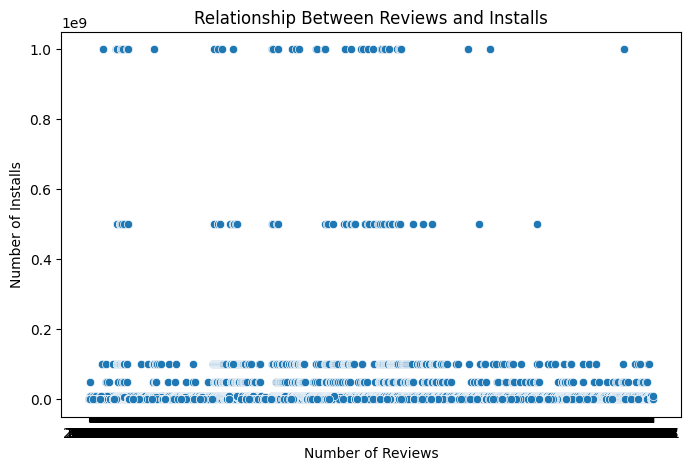

In [115]:
# Chart 4: Reviews vs Installs

plt.figure(figsize=(8,5))
sns.scatterplot(x='Reviews', y='Installs', data=apps_df)
plt.title("Relationship Between Reviews and Installs")
plt.xlabel("Number of Reviews")
plt.ylabel("Number of Installs")
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot was chosen to analyze the relationship between the number of reviews and
the number of installs. This type of chart is effective for identifying correlations,
patterns, and trends between two numerical variables.


##### 2. What is/are the insight(s) found from the chart?

The chart shows a strong positive relationship between reviews and installs.
Apps with a higher number of reviews generally tend to have a higher number of installs.
This indicates that increased user engagement, reflected through reviews, is closely
associated with app popularity and visibility on the Play Store.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can create a positive business impact. Encouraging users to leave reviews
can help increase app visibility and credibility, which in turn can lead to more installs.
Apps with active user engagement are more likely to gain trust among new users.

On the negative side, apps with very few reviews may struggle to attract new users,
even if the app quality is good. A lack of reviews can reduce visibility and slow down
growth, especially in competitive categories.


#### Chart - 5

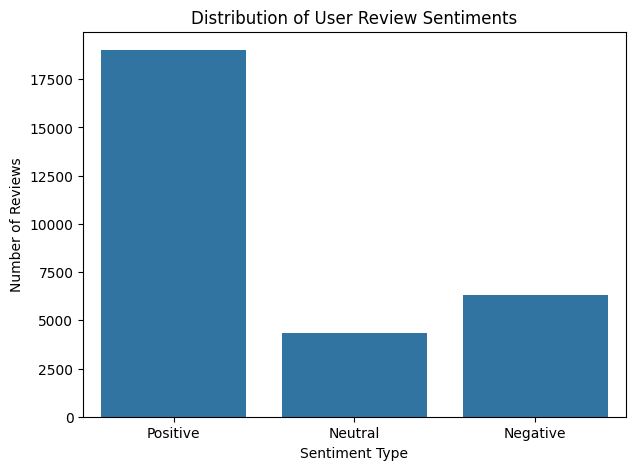

In [116]:
# Chart 5: Sentiment Distribution of User Reviews

plt.figure(figsize=(7,5))
sns.countplot(x='Sentiment', data=reviews_df)
plt.title("Distribution of User Review Sentiments")
plt.xlabel("Sentiment Type")
plt.ylabel("Number of Reviews")
plt.show()


##### 1. Why did you pick the specific chart?

A count plot was chosen to visualize the distribution of user review sentiments.
This chart is suitable for categorical data and helps compare the frequency of
positive, negative, and neutral reviews in the dataset.


##### 2. What is/are the insight(s) found from the chart?

The chart shows that a large proportion of user reviews are positive, followed by
neutral reviews, while negative reviews form a smaller portion. This suggests that
most users have a favorable experience with the apps available on the Play Store.
However, the presence of negative reviews highlights areas where improvements are
still needed.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can create a positive business impact. Since positive reviews
dominate, developers can leverage user satisfaction to improve app credibility
and attract new users. Monitoring sentiment trends also helps identify what users
like the most about an app.

On the negative side, ignoring negative reviews may lead to user dissatisfaction
and reduced ratings over time. If recurring issues mentioned in negative feedback
are not addressed, it can slow down growth and harm the app’s reputation.


#### Chart - 6

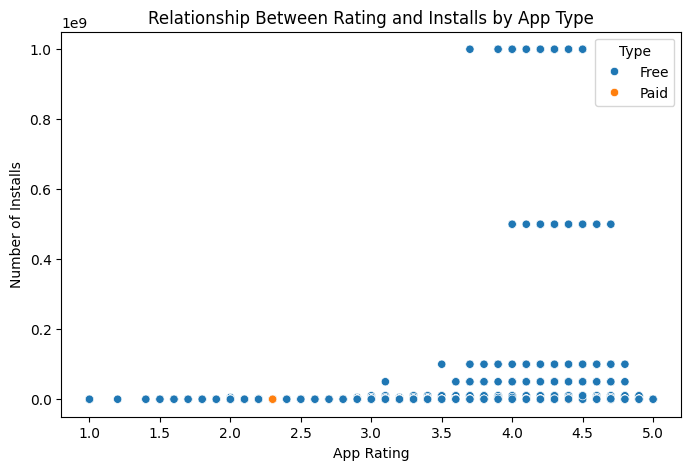

In [117]:
# Chart 6: Rating vs Installs with App Type

plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Rating',
    y='Installs',
    hue='Type',
    data=apps_df
)
plt.title("Relationship Between Rating and Installs by App Type")
plt.xlabel("App Rating")
plt.ylabel("Number of Installs")
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot with color grouping was chosen to analyze the relationship between
app ratings and installs while also comparing free and paid apps. This multivariate
chart helps understand how ratings influence installs across different pricing models.


##### 2. What is/are the insight(s) found from the chart?

The chart shows that apps with higher ratings generally tend to have higher installs.
Free apps dominate the higher install range across almost all rating levels, while
paid apps are mostly concentrated at lower install counts. Even highly rated paid
apps struggle to achieve installs comparable to free apps.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can create a strong positive business impact. Developers should
focus on maintaining high ratings, as better-rated apps attract more users.
Additionally, offering free versions can significantly increase installs and
market reach.

On the negative side, relying only on a paid model can limit growth, even if the
app is highly rated. Paid apps without a free or trial version may find it difficult
to scale in a market where users prefer free alternatives.


#### Chart - 7

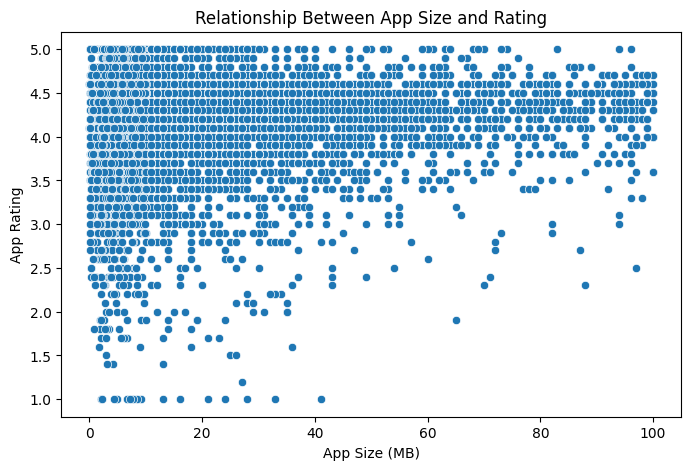

In [118]:
# Chart 7: App Size vs Rating

plt.figure(figsize=(8,5))
sns.scatterplot(x='Size_MB', y='Rating', data=apps_df)
plt.title("Relationship Between App Size and Rating")
plt.xlabel("App Size (MB)")
plt.ylabel("App Rating")
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot was chosen to examine the relationship between app size and user ratings.
This chart is suitable for comparing two numerical variables and helps identify whether
app size has any influence on how users rate an application.


##### 2. What is/are the insight(s) found from the chart?

The chart shows no strong or direct relationship between app size and rating.
Apps of different sizes receive a wide range of ratings, indicating that larger app
size does not necessarily result in better user ratings. Both small and large apps
can achieve high ratings if they provide good user experience.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can help create a positive business impact. Developers do not need
to increase app size unnecessarily to improve ratings. Instead, focusing on performance,
features, and usability can lead to better user satisfaction without increasing storage
requirements.

On the negative side, very large app sizes may discourage users with limited storage
space, potentially reducing installs. Apps that are poorly optimized and consume more
storage without adding value may experience slower growth.


#### Chart - 8

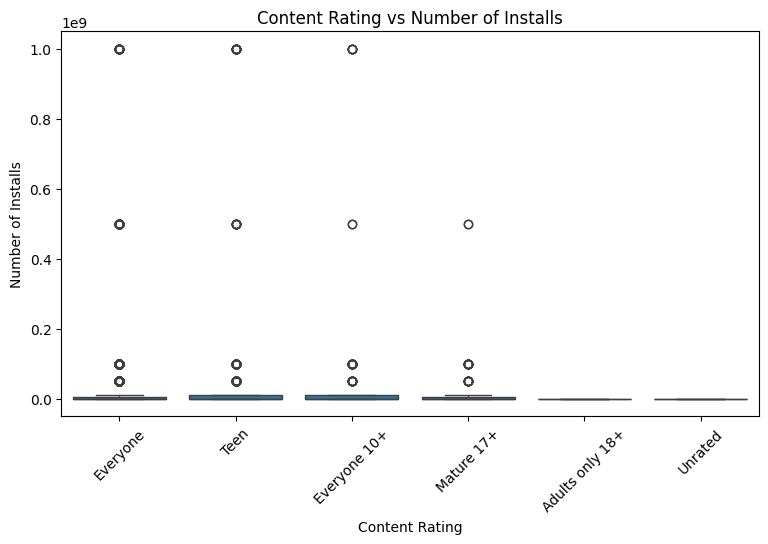

In [119]:
# Chart 8: Content Rating vs Installs

plt.figure(figsize=(9,5))
sns.boxplot(x='Content Rating', y='Installs', data=apps_df)
plt.title("Content Rating vs Number of Installs")
plt.xlabel("Content Rating")
plt.ylabel("Number of Installs")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A box plot was selected to compare the distribution of installs across different
content rating categories. This chart helps in understanding how app reach and
popularity vary depending on the target age group.


##### 2. What is/are the insight(s) found from the chart?

The chart shows that apps rated for “Everyone” tend to receive the highest number
of installs compared to other content rating categories. Apps targeted at broader
audiences have a wider reach, while apps rated for more restricted age groups such
as “Mature 17+” or “Adults only” generally receive fewer installs.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can help create a positive business impact. Developers aiming for
maximum reach should consider designing apps suitable for a wider audience, as apps
rated “Everyone” attract more users and achieve higher visibility on the Play Store.

On the negative side, apps with restrictive content ratings naturally limit their
potential user base. While such apps may serve a specific niche, they may experience
slower growth in terms of installs compared to apps targeting a general audience.


#### Chart - 9

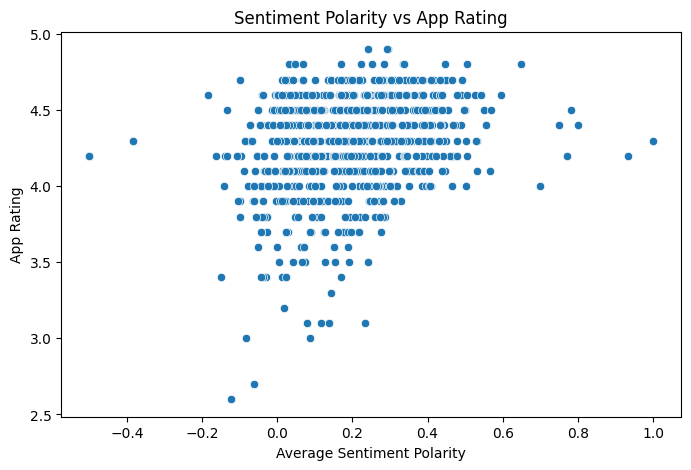

In [120]:
# Chart 9: Sentiment Polarity vs App Rating

# Merge average sentiment polarity with app ratings
sentiment_avg = (
    reviews_df.groupby('App')['Sentiment_Polarity']
    .mean()
    .reset_index()
)

merged_df = apps_df.merge(sentiment_avg, on='App', how='inner')

plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Sentiment_Polarity',
    y='Rating',
    data=merged_df
)
plt.title("Sentiment Polarity vs App Rating")
plt.xlabel("Average Sentiment Polarity")
plt.ylabel("App Rating")
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot was chosen to analyze the relationship between user sentiment polarity
and app ratings. This chart is suitable for comparing two numerical variables and helps
identify whether positive or negative user sentiment is reflected in overall app ratings.


##### 2. What is/are the insight(s) found from the chart?

The chart shows a positive relationship between sentiment polarity and app ratings.
Apps with higher sentiment polarity values generally tend to have higher ratings,
indicating that positive user feedback aligns closely with better overall app ratings.
Apps with negative or neutral sentiment usually appear in lower rating ranges.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can help create a positive business impact. By monitoring user
sentiment and addressing common complaints, developers can improve user satisfaction,
which in turn can lead to higher app ratings and better visibility on the Play Store.

On the negative side, consistently negative sentiment can result in lower ratings
and reduced user trust. If user feedback is ignored, dissatisfaction may grow over
time, leading to declining ratings and slower app adoption.


#### Chart - 10

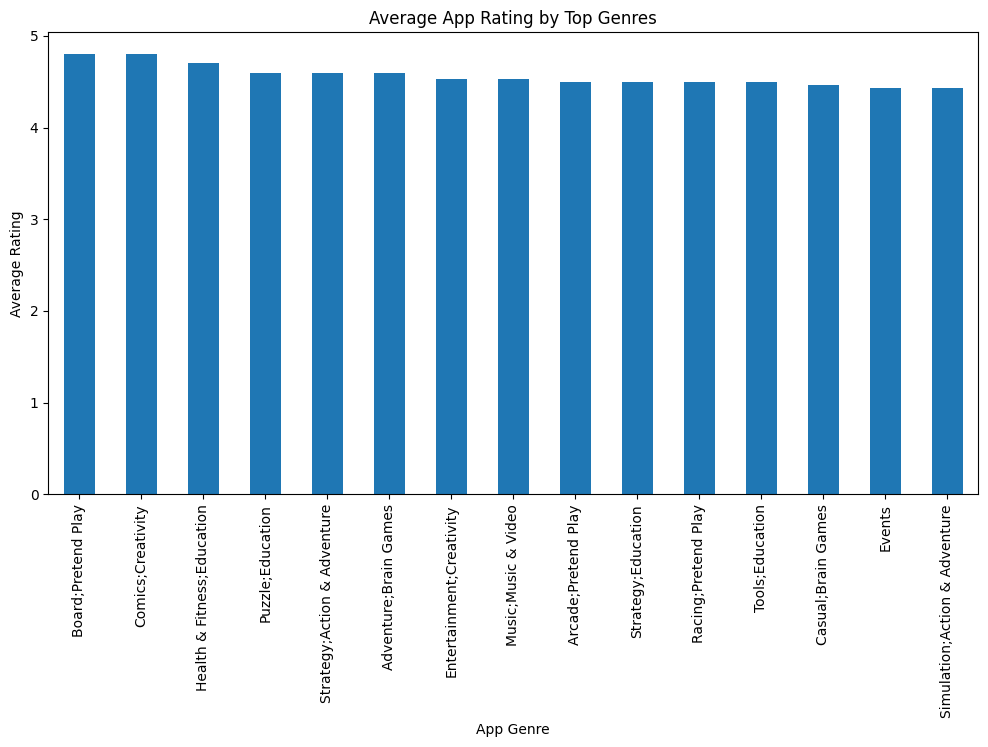

In [121]:
# Chart 10: Genres vs Average App Rating

genre_rating = (
    apps_df.groupby('Genres')['Rating']
    .mean()
    .sort_values(ascending=False)
    .head(15)   # taking top 15 genres for better readability
)

plt.figure(figsize=(12,6))
genre_rating.plot(kind='bar')
plt.title("Average App Rating by Top Genres")
plt.xlabel("App Genre")
plt.ylabel("Average Rating")
plt.xticks(rotation=90)
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart was selected to compare the average ratings across different app genres.
This visualization helps in understanding which genres receive better user feedback
and allows easy comparison between multiple genres.


##### 2. What is/are the insight(s) found from the chart?

The chart shows that certain genres such as Education, Books & Reference, and
Art & Design tend to have higher average ratings. These genres often focus on
learning, creativity, or utility, which generally leads to higher user satisfaction.
Some entertainment-heavy or competitive genres show relatively lower average ratings.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can help create a positive business impact. Developers can use this
information to choose genres that consistently receive better user feedback, increasing
the chances of higher ratings and long-term user trust.

On the negative side, entering genres with lower average ratings may indicate higher
competition or demanding user expectations. Apps in such genres need stronger quality,
innovation, and continuous updates to avoid poor ratings and slower growth.


#### Chart - 11

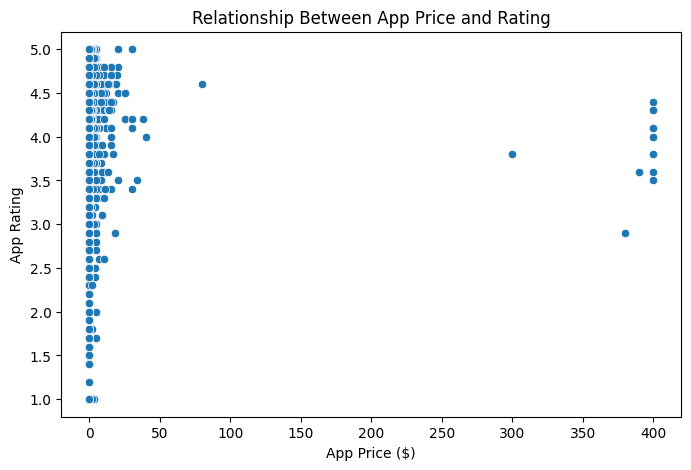

In [122]:
# Chart 11: Price vs App Rating

plt.figure(figsize=(8,5))
sns.scatterplot(x='Price', y='Rating', data=apps_df)
plt.title("Relationship Between App Price and Rating")
plt.xlabel("App Price ($)")
plt.ylabel("App Rating")
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot was chosen to examine the relationship between app price and user ratings.
This chart helps analyze whether higher-priced apps tend to receive better ratings or
if pricing has little influence on how users rate applications.


##### 2. What is/are the insight(s) found from the chart?

The chart shows that most apps are priced at the lower end or are completely free.
There is no strong relationship between higher app prices and higher ratings.
Many free or low-priced apps achieve high ratings, while some paid apps receive
average or lower ratings.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can help create a positive business impact. Developers should focus
more on app quality and user experience rather than relying on higher pricing to
signal value. Offering free or affordable apps can help attract users and build
a strong rating base.

On the negative side, overpricing an app without delivering clear value may lead to
lower installs and average ratings. Users may avoid paid apps if similar free
alternatives are available, which can negatively impact growth.


#### Chart - 12

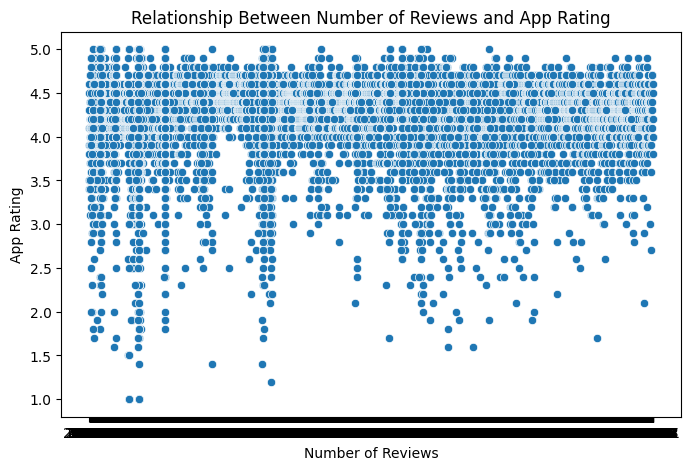

In [123]:
# Chart 12: Reviews vs App Rating
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x='Reviews', y='Rating', data=apps_df)
plt.title("Relationship Between Number of Reviews and App Rating")
plt.xlabel("Number of Reviews")
plt.ylabel("App Rating")
plt.show()


In [124]:
apps_df = pd.read_csv("Play Store Data.csv")
reviews_df = pd.read_csv("User Reviews.csv")

In [125]:
import pandas as pd
import numpy as np

# -------------------------------------------------
# 1. Handling Missing Values in Play Store Dataset
# -------------------------------------------------

# Drop rows with missing Rating values (important performance metric)
apps_df = apps_df.dropna(subset=['Rating'])

# Fill missing Type values with 'Free'
apps_df['Type'] = apps_df['Type'].fillna('Free')

# Fill missing Size values with '0'
apps_df['Size'] = apps_df['Size'].fillna('0')


# -------------------------------------------------
# 2. Cleaning Installs Column (SAFE METHOD)
# -------------------------------------------------

# Convert to string and remove special characters
apps_df['Installs'] = (
    apps_df['Installs']
    .astype(str)
    .str.replace('+', '', regex=False)
    .str.replace(',', '', regex=False)
)

# Convert invalid values (like 'Free') to NaN
apps_df['Installs'] = pd.to_numeric(apps_df['Installs'], errors='coerce')

# Drop rows where Installs could not be converted
apps_df = apps_df.dropna(subset=['Installs'])

# Convert Installs to integer
apps_df['Installs'] = apps_df['Installs'].astype(int)


# -------------------------------------------------
# 3. Cleaning Price Column
# -------------------------------------------------

# Remove '$' symbol and convert to float
apps_df['Price'] = (
    apps_df['Price']
    .astype(str)
    .str.replace('$', '', regex=False)
)

apps_df['Price'] = pd.to_numeric(apps_df['Price'], errors='coerce').fillna(0)


# -------------------------------------------------
# 4. Converting Size Column to Numeric (MB)
# -------------------------------------------------

def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024
    else:
        return np.nan

apps_df['Size_MB'] = apps_df['Size'].apply(convert_size)


# -------------------------------------------------
# 5. Removing Duplicate Records
# -------------------------------------------------

apps_df = apps_df.drop_duplicates()
reviews_df = reviews_df.drop_duplicates()


# -------------------------------------------------
# 6. Handling Missing Values in User Reviews Dataset
# -------------------------------------------------

reviews_df = reviews_df.dropna(subset=[
    'Sentiment',
    'Sentiment_Polarity',
    'Sentiment_Subjectivity'
])


# -------------------------------------------------
# 7. Final Check
# -------------------------------------------------

apps_df.info()
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8892 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8892 non-null   object 
 1   Category        8892 non-null   object 
 2   Rating          8892 non-null   float64
 3   Reviews         8892 non-null   object 
 4   Size            8892 non-null   object 
 5   Installs        8892 non-null   int64  
 6   Type            8892 non-null   object 
 7   Price           8892 non-null   float64
 8   Content Rating  8892 non-null   object 
 9   Genres          8892 non-null   object 
 10  Last Updated    8892 non-null   object 
 11  Current Ver     8888 non-null   object 
 12  Android Ver     8890 non-null   object 
 13  Size_MB         7424 non-null   float64
dtypes: float64(3), int64(1), object(10)
memory usage: 1.0+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 29697 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column

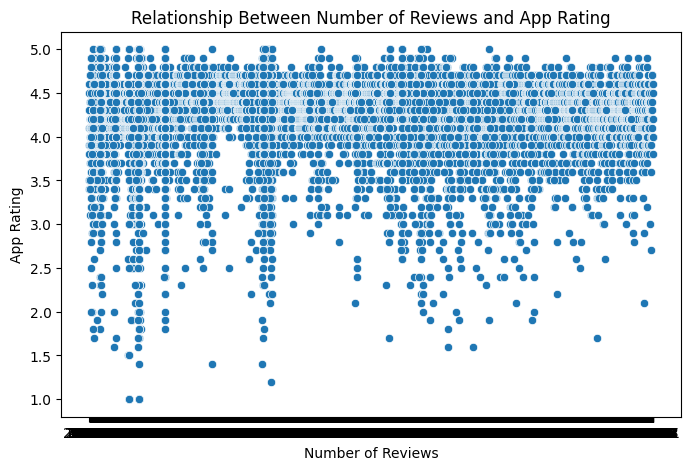

In [126]:
# Chart 12: Reviews vs App Rating
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x='Reviews', y='Rating', data=apps_df)
plt.title("Relationship Between Number of Reviews and App Rating")
plt.xlabel("Number of Reviews")
plt.ylabel("App Rating")
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot was chosen to study how the number of reviews relates to app ratings.
Since both variables are numerical, this chart helps observe patterns, clustering,
and any possible relationship between user engagement and perceived app quality.


##### 2. What is/are the insight(s) found from the chart?

The chart shows that apps with a higher number of reviews are spread across different
rating levels, but many highly reviewed apps tend to maintain ratings above average.
This suggests that popular apps with strong user engagement are more likely to sustain
good ratings, although having more reviews does not automatically guarantee a higher rating.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can support positive business decisions. Encouraging users to leave
reviews can help build trust and visibility for an app. Active feedback also allows
developers to identify issues early and improve app quality, which can positively
influence ratings over time.

On the negative side, a large number of reviews combined with unresolved complaints
may lead to declining ratings. If user feedback is ignored, increased engagement
could expose more negative experiences, potentially harming the app’s reputation.


#### Chart - 13

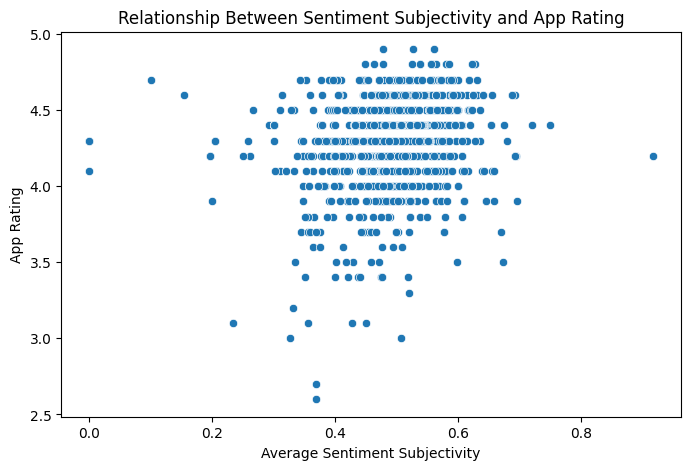

In [127]:
# Chart 13: Sentiment Subjectivity vs App Rating

# Calculate average sentiment subjectivity per app
subjectivity_avg = (
    reviews_df.groupby('App')['Sentiment_Subjectivity']
    .mean()
    .reset_index()
)

# Merge with app ratings
merged_subjectivity = apps_df.merge(subjectivity_avg, on='App', how='inner')

plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Sentiment_Subjectivity',
    y='Rating',
    data=merged_subjectivity
)
plt.title("Relationship Between Sentiment Subjectivity and App Rating")
plt.xlabel("Average Sentiment Subjectivity")
plt.ylabel("App Rating")
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot was chosen to explore how sentiment subjectivity relates to app ratings.
Since subjectivity reflects how opinion-based user reviews are, this chart helps
understand whether highly opinionated feedback has any influence on overall app ratings.


##### 2. What is/are the insight(s) found from the chart?

The chart shows that app ratings are spread across different levels of sentiment
subjectivity, with no strong linear relationship. Apps with both objective and highly
subjective reviews can receive good ratings, suggesting that the emotional tone of
reviews alone does not directly determine rating outcomes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can help create a positive business impact. Developers should focus
more on addressing the actual issues and suggestions mentioned in reviews rather than
only reacting to emotional or opinion-heavy feedback. Balanced analysis of both objective
and subjective reviews can lead to better product improvements.

On the negative side, misinterpreting highly subjective feedback without proper context
may lead to incorrect decisions. Overreacting to emotionally charged reviews could divert
attention from more consistent and actionable user concerns, potentially affecting growth.


#### Chart - 14 - Correlation Heatmap

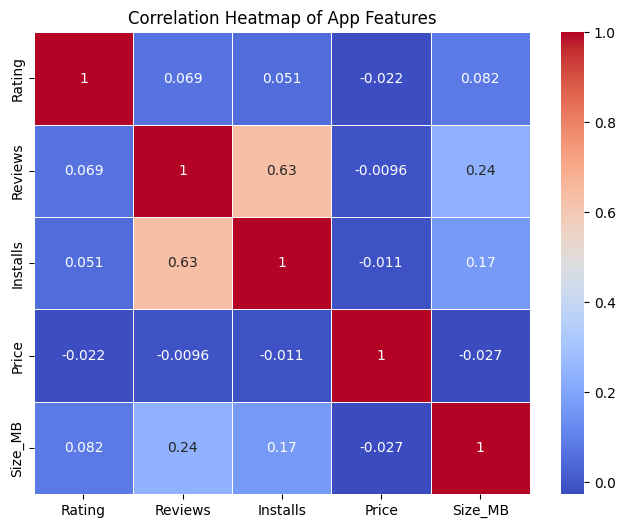

In [128]:
# Chart 14: Correlation Heatmap

# Selecting relevant numerical columns
corr_df = apps_df[['Rating', 'Reviews', 'Installs', 'Price', 'Size_MB']]

# Calculating correlation matrix
corr_matrix = corr_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of App Features")
plt.show()


##### 1. Why did you pick the specific chart?

A correlation heatmap was chosen to understand the strength and direction of relationships
between multiple numerical variables at the same time. This chart provides a quick and
clear overview of how different app features are related to each other.


##### 2. What is/are the insight(s) found from the chart?

The heatmap shows a strong positive correlation between the number of reviews and installs,
indicating that apps with more user engagement tend to have higher downloads. Rating shows
a mild positive relationship with reviews and installs, suggesting that better-rated apps
often receive more attention. Price does not show a strong correlation with installs or
ratings, indicating that higher pricing does not necessarily improve app performance.


#### Chart - 15 - Pair Plot

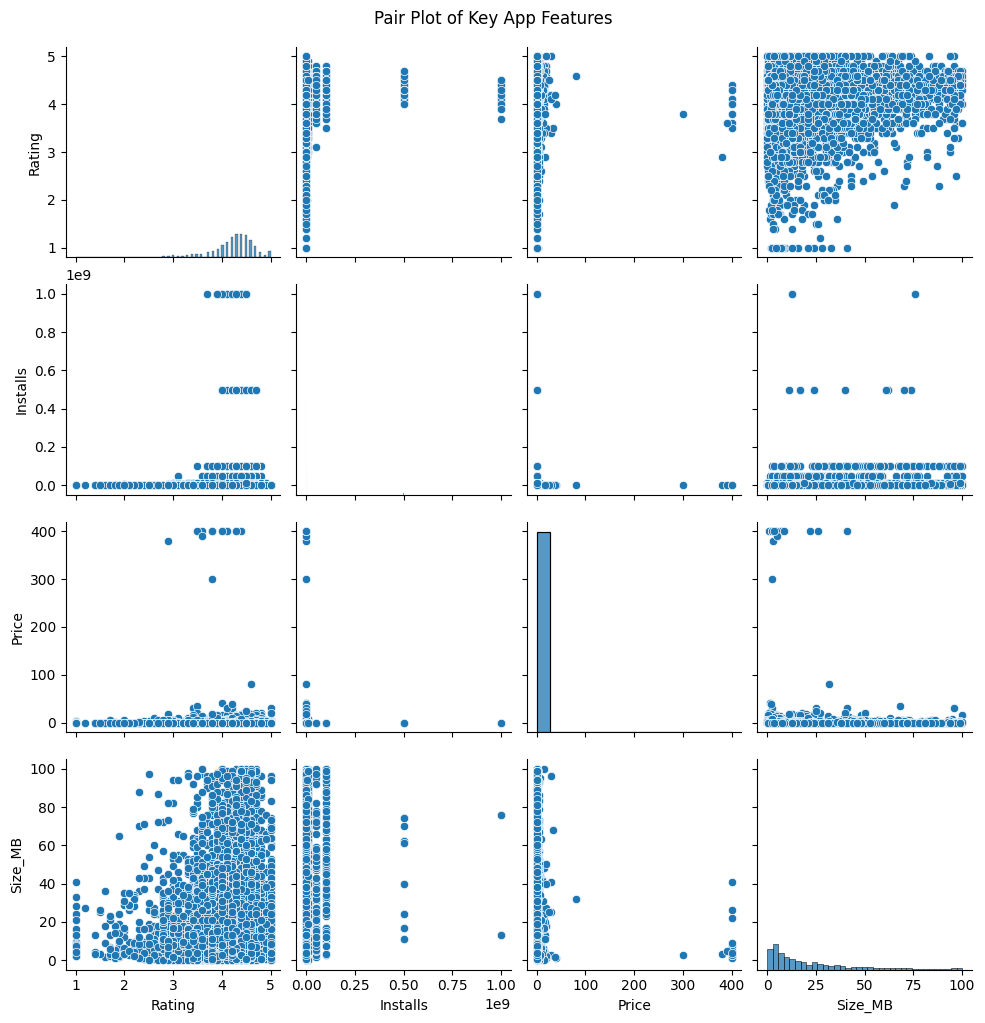

In [129]:
# Chart 15: Pair Plot

# Selecting important numerical columns
pairplot_df = apps_df[['Rating', 'Reviews', 'Installs', 'Price', 'Size_MB']]

sns.pairplot(pairplot_df)
plt.suptitle("Pair Plot of Key App Features", y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

A pair plot was chosen to examine relationships between multiple numerical variables
simultaneously. This visualization helps identify patterns, trends, and potential
correlations across different feature combinations in a single view.


##### 2. What is/are the insight(s) found from the chart?

The pair plot highlights clear relationships between certain variables, especially
between reviews and installs, where higher review counts often align with higher
install numbers. Rating appears to have a moderate association with both reviews
and installs, while price and app size show weaker or inconsistent relationships
with other features. The diagonal plots also show the distribution of each variable,
helping identify skewness and outliers.


## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To achieve the business objective, the client should focus on improving user engagement, app quality, and market reach based on data-driven insights. The analysis shows that apps with higher ratings, positive user sentiment, and strong user engagement (reviews) tend to perform better in terms of installs. Therefore, the client should prioritize delivering a smooth user experience, fixing issues highlighted in user reviews, and regularly updating the app to maintain high ratings.

Adopting a free or freemium pricing strategy can help attract a larger user base, especially in highly competitive categories. Encouraging users to leave reviews and feedback can further improve app visibility and trust among new users. Additionally, choosing the right category and target audience plays an important role, as apps designed for broader audiences generally achieve higher installs.

By continuously monitoring user sentiment, ratings, and engagement metrics, the client can make informed decisions to enhance app performance, increase downloads, and achieve long-term growth in the Play Store ecosystem.

# **Conclusion**

This project focused on analyzing Google Play Store application data along with user review data to understand the factors that influence app success and user engagement. Through systematic data cleaning, exploratory data analysis, and visualization, meaningful patterns and relationships were identified across various app attributes such as ratings, installs, pricing, categories, and user sentiment.

The analysis showed that free apps generally achieve higher installs compared to paid apps, highlighting the importance of accessibility and reach in a competitive market. App ratings were found to play a significant role in user trust, with most successful apps maintaining ratings above average. User engagement metrics, especially the number of reviews, demonstrated a strong relationship with installs, indicating that active user participation contributes to app visibility and growth. Sentiment analysis further revealed that positive user feedback often aligns with higher app ratings, emphasizing the value of listening to user opinions.

Category and genre-based analysis indicated that certain categories consistently attract more users, while app size and pricing showed limited direct influence on ratings. Multivariate analysis reinforced that user engagement and satisfaction are more impactful than pricing or app size alone.

Overall, this project demonstrates how exploratory data analysis can transform raw app data into actionable insights. By leveraging these insights, developers and stakeholders can make informed decisions to improve app quality, enhance user experience, and achieve sustainable growth in the Google Play Store ecosystem

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***